In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
print("First few rows of the dataset:")
print(data.head())



First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


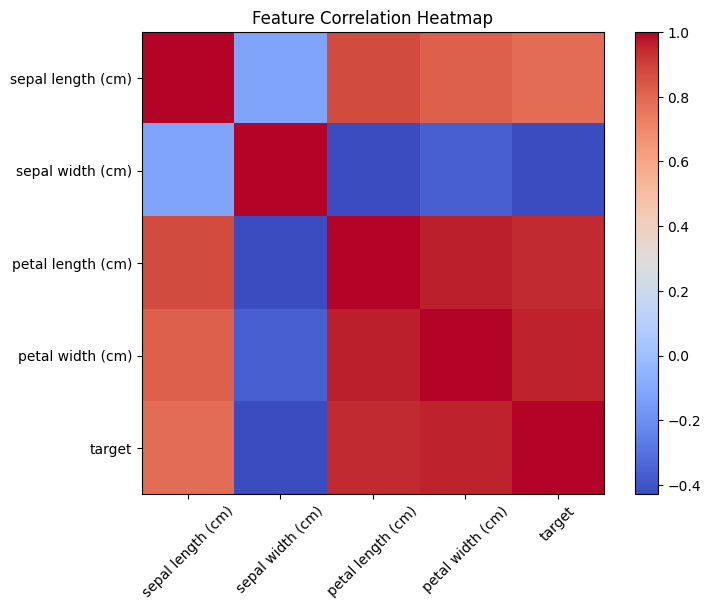

In [5]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']].values
y = data['petal length (cm)'].values

In [7]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [8]:
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones as the first column

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
def gradient_descent(X, y, learning_rate=0.01, max_iter=1000, tolerance=1e-6):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize coefficients
    cost_history = []

    for i in range(max_iter):
        # Compute predictions
        predictions = X @ theta
        # Compute residuals
        errors = predictions - y
        # Compute cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(errors**2)
        cost_history.append(cost)

        # Compute gradients
        gradients = (1 / m) * (X.T @ errors)

        # Update coefficients
        theta -= learning_rate * gradients

        # Check for convergence
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            print(f"Converged after {i} iterations.")
            break

    return theta, cost_history



In [11]:
learning_rate = 0.01
max_iter = 1000

In [12]:
theta, cost_history = gradient_descent(X_train, y_train, learning_rate, max_iter)
print("Optimized Coefficients (Theta):", theta)

Converged after 992 iterations.
Optimized Coefficients (Theta): [ 3.77849415  0.63936629 -0.2907439   1.06722333]


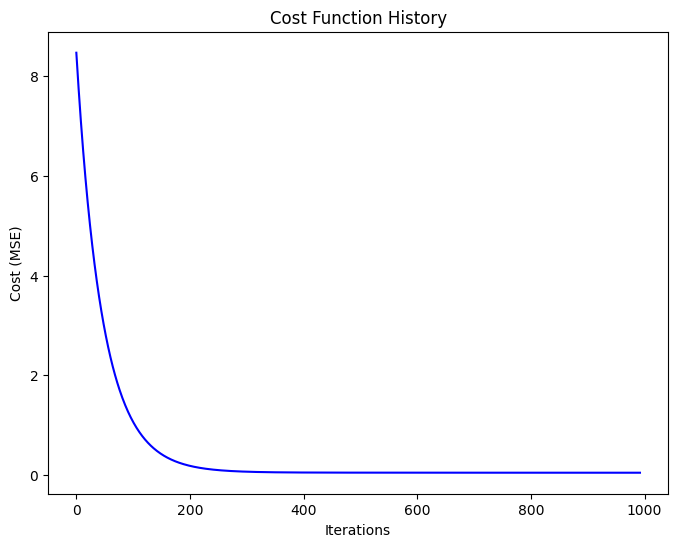

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title("Cost Function History")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.show()

In [16]:
y_pred = X_test @ theta

In [17]:
mse = np.mean((y_pred - y_test) ** 2)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

In [18]:
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


 0.12912958780326436MSE):
R-squared (R²): 0.9605998579414717


<ipython-input-19-e860cac5a06f>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


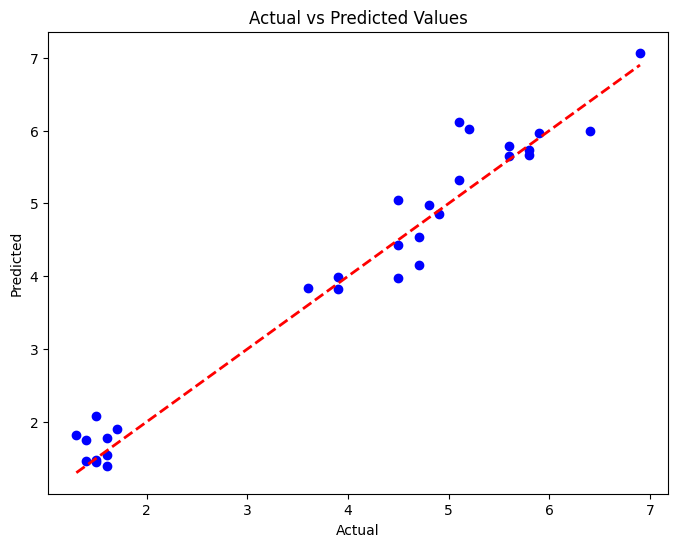

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()